# A Gentle Start

* **Reading**: Chapter 2, Understanding Machine Learning by Shai Shalev-Shwartz and Shai Ben-David

Basic notions in machine learning include the following elements.
* The domain set is represented by $\mathcal{X}$.
* The label set is represented by $\mathcal{Y}$ and, at the onset, we take $\mathcal{Y} = \{ 0, 1 \}$.
* The training data is denoted by $S = \left\{ (x_i, y_i) \right\}$, where each element in this set belongs to $\mathcal{X} \times \mathcal{Y}$.


## Goal

* The learner wishes to create a prediction rule by $h : \mathcal{X} \mapsto \mathcal{Y}$. This function is also called a predictor, a hypothesis, or a classifier.
The rule should come from hypothesis class $\mathcal{H}$.
* It is sometime useful to denote a (correct) labeling function $f : \mathcal{X} \mapsto \mathcal{Y}$ such that $y_i = f(x_i)$ for all $i$.


### Design Objective

* The last component needed is a measure of success. A typical such criterion can be derived from the probability of classification error:
\begin{equation*}
L_{(\mathcal{D}, f)} (h)
\doteq \Pr_{x \sim \mathcal{D}} (h(x) \neq f(x))
= \mathcal{D} \left( \{ x : h(x) \neq f(x) \} \right) .
\end{equation*}
In general, the nomenclature $L_{(\mathcal{D}, f)} (\cdot)$ refers to a loss function and $\mathcal{D}$ is the probability distribution underlying $\mathcal{X}$.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(100)

## Example 1.a

Let $\mathcal{D}$ be a multivariate normal distribution with location parameter $\boldsymbol{\mu} = \mathbf{0}$ and covariance matrix $\boldsymbol{\Sigma} = \mathbf{I}$.
Moreover, assume that the labeling function $f : \mathcal{X} \mapsto \mathbf{Y}$ is given by
\begin{equation*}
f(\mathbf{x}) = \operatorname{sign} \left( \langle \mathbf{x} | \mathbf{v} \rangle \right)
\end{equation*}
where $\mathbf{v}$ is a fixed vector.
A possible hypothesis class $\mathcal{H}$ can be formed as follows.
First, we identify a set of candidate vectors
\begin{equation*}
\mathbf{v}_k = (\cos \theta, \sin \theta)
\end{equation*}
where $\theta = \frac{2 \pi k}{N}$ and $k \in [N]$.
Then, we consider hypotheses of the form
$h_k(\mathbf{x}) = \operatorname{sign} \left( \langle \mathbf{x} | \mathbf{v}_k \rangle \right)$.
In this case, each vector partitions the plane into two half planes, and the boundary is a strainght line going through the origin.

Label Vector: [ 1.  0.]


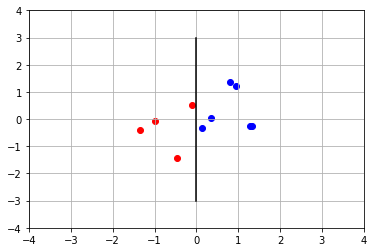

In [54]:
# Labeling function and, implicitly, hypothesis class
N = 20
theta = 2 * np.pi * np.random.randint(N) / N
fvector = np.array([np.cos(theta), np.sin(theta)])
perpvector = np.array([fvector[1], -fvector[0]])
boundary = np.outer(perpvector, np.arange(-3,3.1,0.1))
print('Label Vector: ' + str(fvector))

# Distribution and training examples
mu = 0
sigma = 1
X = np.random.normal(mu, sigma, (10,2))

def labelfunction(x_i):
    sign = np.sign(np.inner(x_i, fvector))
    return sign

XY_df = pd.DataFrame(X, columns=['pos1','pos2'])
XY_df['Y'] = labelfunction(X)
set1 = XY_df.loc[XY_df['Y'] > 0].as_matrix(['pos1','pos2'])
set0 = XY_df.loc[XY_df['Y'] < 0].as_matrix(['pos1','pos2'])

x, y = zip(*set1)
plt.scatter(x, y, c='b')
x, y = zip(*set0)
plt.scatter(x, y, c='r')

plt.plot(boundary[0,:],boundary[1,:], c='k')
ax = plt.gca()
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.grid()
plt.show()

# Empirical Risk Minimization (ERM)

Given that only the training sample is available to the learner, it may be appealing to search for a solution that works well on $S$:
\begin{equation*}
L_{S} (h) \doteq \frac{\left| \{ i \in [m] : h(x_i) \neq u_i \} \right|}{m} .
\end{equation*}
The objective function is often referred to as the empirical error and empirical risk.
Unfortunatly, ERM is prone to overfitting, a phenomenon where the hypothesis fits the training data well, but performs poorly in reality.


## Inductive Bias

A common strategy to prevent overfitting is to apply the ERM learning rule over a restricted hypothesis class $\mathcal{H}$.
The learner then uses the ERM rule to choose a predictor $h \in \mathcal{H}$, with the lowest possible error over $S$;
\begin{equation*}
\mathrm{ERM}_{\mathcal{H}} (S) \in \operatorname{argmin}_{h \in \mathcal{H}} L_S (h) .
\end{equation*}
Choosing a restricted hypothesis class can help protect against overfitting, but it may cause us a stronger inductive bias.


## Assumptions

**Realizability Assumption:** There exists $h^{\star} \in \mathcal{H}$ such that $L_{(\mathcal{D}, f)} (h^{\star}) = 0$.
Note that this assumption implies that $L_S(h^{\star}) = 0$ almost surely.

**IID Assumption:** The points in the training set $S$ are drawn independently according to the distribution $\mathcal{D}$. Consequently, $S \sim \mathcal{D}^m$ where $m$ is the cardinality of $S$.


## Example 1.b

Let $\mathcal{H}$ be the hypothesis class given by
\begin{equation*}
h_w(\mathbf{x}) = \operatorname{sign} \left( \langle \mathbf{x} | \mathbf{w} \rangle \right)
\end{equation*}
where $\mathbf{w}$ is a fixed vector.

## Probability Bounds

There is some probability that the sampled training data $S$ is nonrepresentative of the underlying distribution $\mathcal{D}$, in which case $L_{(\mathcal{D}, f)} (h_S)$ may feature bad performance.
The probability of getting a nonrepresentative sample is denoted by $\delta$, and $(1 − \delta)$ is call the confidence parameter of the prediction problem.

Let $\epsilon$ denote the accuracy parameter.
We interpret the event $L_{(\mathcal{D}, f)}(h_S) > \epsilon$ as a failure of the learner, whereas the condition $L_{(\mathcal{D}, f)}(h_S) \leq \epsilon$ is deemed an approximately correct predictor.
We wish to bound
\begin{equation*}
\mathcal{D}^m \left( \left\{ \left. S \right|_x : L_{(\mathcal{D}, f)}(h_S) > \epsilon \right\} \right)
\end{equation*}
Let $\mathcal{H}_{\mathrm{B}}$ be the set of bad hypothesis,
\begin{equation*}
\mathcal{H}_{\mathrm{B}}
= \left\{ h \in \mathcal{H} : L_{(\mathcal{D}, f)}(h) > \epsilon \right\} .
\end{equation*}
Also, let
\begin{equation*}
M = \left\{ \left. S \right|_x : \exists h \in \mathcal{H}_{\mathrm{B}}, L_S(h) = 0 \right\} .
\end{equation*}

The event $L_{\mathcal{D}, f}(h_S) > \epsilon$ can only happen if for some $h \in \mathcal{H}_{\mathrm{B}}$ we have $L_S (h) = 0$.
In other words, this event will only happen if our sample is in the set of misleading samples, $M$,
\begin{equation*}
\left\{ \left. S \right|_x :  L_{(\mathcal{D}, f)}(h_S) > \epsilon \right\} \subseteq M.
\end{equation*}
Then
\begin{equation*}
\begin{split}
\mathcal{D}^m \left( \left\{ \left. S \right|_x :  L_{(\mathcal{D}, f)}(h_S) > \epsilon \right\} \right)
&\leq \mathcal{D}^m (M) \\
&\leq \sum_{h \in \mathcal{H}_{\mathrm{B}}} \mathcal{D}^m \left( \left\{ \left. S \right|_x :  L_S(h) = 0 \right\} \right) \\
&= \sum_{h \in \mathcal{H}_{\mathrm{B}}} \mathcal{D}^m \left( \left\{ \left. S \right|_x : \forall i, h(x_i) = f(x_i) \right\} \right) \\
&= \sum_{h \in \mathcal{H}_{\mathrm{B}}} \prod_{i=1}^m \mathcal{D} (h(x_i) = f(x_i)) .
\end{split}
\end{equation*}
For each individual sampling of an element of the training set we have
\begin{equation*}
\mathcal{D} (h(x_i) = f(x_i)) = 1 - L_{(\mathcal{D}, f)}(h)
\leq 1 - \epsilon .
\end{equation*}
Combining these results, we get
\begin{equation*}
\mathcal{D}^m \left( \left\{ \left. S \right|_x :  L_{(\mathcal{D}, f)}(h_S) > \epsilon \right\} \right)
\leq \left| \mathcal{H}_{\mathrm{B}} \right| (1 - \epsilon)^m
\leq \left| \mathcal{H} \right| e^{- \epsilon m} .
\end{equation*}

## Probably Approximately Correct (PAC) Learning

A finite hypothesis class $\mathcal{H}$ is PAC learnable if there exists a function $m_{\mathcal{H}} : (0,1)^2 \mapsto \mathbb{N}$ and a learning algorithm with the following property.
For every $\epsilon, \delta \in (0,1)$; for every $\mathcal{D}$ over $\mathcal{X}$ and every labeling function $f : \mathcal{X} \mapsto \mathcal{Y}$ for which the realizability assumption holds;
when running the learning algorithm on $m \geq m_{\mathcal{H}}(\epsilon, \delta)$ IID examples generated independently, the algorithm returns a hypothesis $h$ such that
\begin{equation*}
\mathcal{D}^m \left( \left\{ \left. S \right|_x :  L_{(\mathcal{D}, f)}(h_S) > \epsilon \right\} \right)
\leq \delta .
\end{equation*}


In the present case, the bound above guarantees that, when
\begin{equation*}
m \geq \frac{\log \left( \left| \mathcal{H} \right| / \delta \right)}{\epsilon} ,
\end{equation*}
we have
\begin{equation*}
\mathcal{D}^m \left( \left\{ \left. S \right|_x :  L_{(\mathcal{D}, f)}(h_S) > \epsilon \right\} \right)
\leq \delta .
\end{equation*}
That is, for a sufficiently large $m$, the $\mathrm{ERM}_{\mathcal{H}}$ rule over a finite hypothesis class will be probably (with confidence $1 - \delta$) approximately (up to an error of $\epsilon$) correct.


